M. Amintoosi

Chapter 7 of Zaki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [2]:
u1 = np.array([[1], [1]])
u1 = u1 / np.linalg.norm(u1)
# u1, np.linalg.norm(u1)

In [3]:
u2 = u1.copy()
u2[0] *= -1
u1, u2

(array([[0.70710678],
        [0.70710678]]),
 array([[-0.70710678],
        [ 0.70710678]]))

Text([0.5], [1.04], 'x')

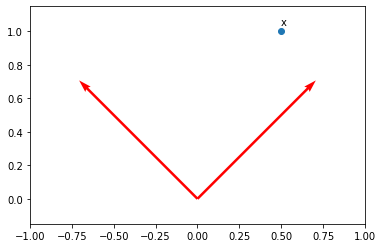

In [14]:
origin = np.array([0, 0])
plt.quiver(
    origin[0],
    origin[1],
    u1[0],
    u1[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)
plt.quiver(
    origin[0],
    origin[1],
    u2[0],
    u2[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)

x = np.array([0.5, 1])
x = np.reshape(x, (2, 1))
plt.scatter(x[0], x[1])
plt.axis("equal")
plt.axis([-1, 1, 0, 1])
plt.text(x[0], x[1]+0.04, "x")

In [10]:
U = np.concatenate((u1, u2), axis=1)
U, x

(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([[0.5],
        [1. ]]))

In [12]:
a = U.T @ x
x, a, U @ a

(array([[0.5],
        [1. ]]),
 array([[1.06066017],
        [0.35355339]]),
 array([[0.5],
        [1. ]]))

(-1.0, 1.0, 0.0, 1.0)

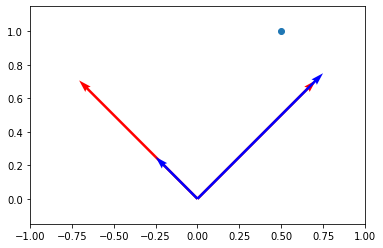

In [66]:
origin = np.array([0, 0])
plt.quiver(
    origin[0],
    origin[1],
    u1[0],
    u1[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)
plt.quiver(
    origin[0],
    origin[1],
    u2[0],
    u2[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)
a1u1 = a[0] * u1
a2u2 = a[1] * u2
plt.quiver(
    origin[0],
    origin[1],
    a1u1[0],
    a1u1[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="b",
)
plt.quiver(
    origin[0],
    origin[1],
    a2u2[0],
    a2u2[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="b",
)

plt.scatter(x[0], x[1])
plt.axis("equal")
plt.axis([-1, 1, 0, 1])

In [68]:
U, x, a

(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([[0.5],
        [1. ]]),
 array([[1.06066017],
        [0.35355339]]))

In [16]:
u1 * a[0] + u2 * a[1], U @ a

(array([[0.5],
        [1. ]]),
 array([[0.5],
        [1. ]]))

In [22]:
# Eq 7.6
a[0]*u1, U[:,0:1]@a[:1], u1 @ a[:1], u1 @ a[0]


(array([[0.75],
        [0.75]]),
 array([[0.75],
        [0.75]]),
 array([[0.75],
        [0.75]]),
 array([0.75, 0.75]))

In [23]:
x_reconstructed = a[0]*u1

(-1.0, 1.0, 0.0, 1.0)

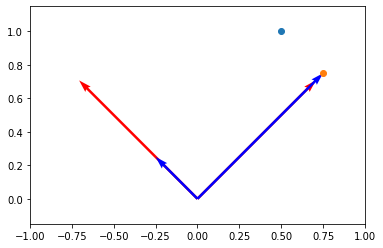

In [26]:
origin = np.array([0, 0])
plt.quiver(
    origin[0],
    origin[1],
    u1[0],
    u1[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)
plt.quiver(
    origin[0],
    origin[1],
    u2[0],
    u2[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)
a1u1 = a[0] * u1
a2u2 = a[1] * u2
plt.quiver(
    origin[0],
    origin[1],
    a1u1[0],
    a1u1[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="b",
)
plt.quiver(
    origin[0],
    origin[1],
    a2u2[0],
    a2u2[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="b",
)

plt.scatter(x[0], x[1])
plt.scatter(x_reconstructed[0], x_reconstructed[1])
plt.axis("equal")
plt.axis([-1, 1, 0, 1])

In [32]:
X = np.array([[2, 3], [3, 2], [4, 6], [5, 4], [6, 7]])
mean_X = np.mean(X, axis=0)
X_meaned = X - mean_X

# Step-2
# covariance, function needs samples as columns
cov_mat = np.cov(X_meaned.T)
cov_mat

array([[2.5, 2.5],
       [2.5, 4.3]])

In [33]:
1 / (X.shape[0] - 1) * X_meaned.T @ X_meaned

array([[2.5, 2.5],
       [2.5, 4.3]])

In [34]:
# Step-3
# A = V * D * V^-1
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
eigen_values, eigen_vectors

(array([0.74293395, 6.05706605]),
 array([[-0.81814408,  0.57501327],
        [ 0.57501327,  0.81814408]]))

In [63]:
A = cov_mat
lambda1 = eigen_values[0]
x1 = eigen_vectors[:, 0]
x1 = x1[:, np.newaxis]
print(x1)
print(A @ x1)
print(lambda1 * x1)

[[-0.81814408]
 [ 0.57501327]]
[[-0.60782701]
 [ 0.42719688]]
[[-0.60782701]
 [ 0.42719688]]


In [35]:
X_reconstructed = eigen_vectors @ np.diag(eigen_values) @ np.linalg.inv(eigen_vectors)
X_reconstructed

array([[2.5, 2.5],
       [2.5, 4.3]])

In [36]:
# Step-4
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]
sorted_eigenvalues, sorted_eigenvectors

(array([6.05706605, 0.74293395]),
 array([[ 0.57501327, -0.81814408],
        [ 0.81814408,  0.57501327]]))

In [37]:
num_components = 1
# Step-5
eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
eigenvector_subset

array([[0.57501327],
       [0.81814408]])

In [38]:
# Step-6
X_projected = X_meaned @ eigenvector_subset
X_projected

array([[-2.29542826],
       [-2.53855906],
       [ 1.30903053],
       [ 0.24775564],
       [ 3.27720115]])

In [39]:
X_reconstructed = X_projected @ eigenvector_subset.T + mean_X
X_reconstructed

array([[2.68009828, 2.52200896],
       [2.54029484, 2.32309293],
       [4.75270993, 5.47097557],
       [4.14246278, 4.60269981],
       [5.88443417, 7.08122272]])

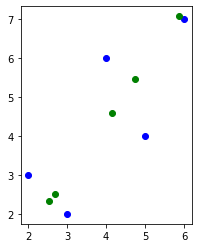

In [40]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c="blue")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c="green")
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.draw()

In [41]:
def PCA(X, num_components):
    # Step-1
    mean_X = np.mean(X, axis=0)
    X_meaned = X - mean_X

    # Step-2
    # covariance, function needs samples as columns
    cov_mat = np.cov(X_meaned.T)

    # Step-3
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    # Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    # sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # Step-5
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    # Step-6
    X_projected = X_meaned @ eigenvector_subset

    X_reconstructed = X_projected @ eigenvector_subset.T + mean_X

    return X_projected, X_reconstructed

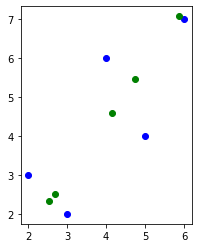

In [42]:
# Applying it to PCA function
X_projected, X_reconstructed = PCA(X, 1)

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c="blue")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c="green")
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.draw()

In [43]:
w0, w1 = 1, 2
N = 10

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)

epsilon = 0.5 * np.random.randn(N, 1)
y = w0 + w1 * x + epsilon
X = np.hstack([x, y])
X.shape

(10, 2)

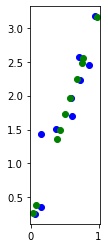

In [50]:
X_projected, X_reconstructed = PCA(X, 1)

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c="blue")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c="green")
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.draw()